In [1]:
import numpy

In [2]:
import pkg_resources
pkg_resources.require("salty-ilthermo==0.2.dev17")
import salty
#/home/wbeckner/anaconda3/envs/py37/bin

In [3]:
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns; sns.set()
%matplotlib inline
from os.path import join
from IPython.display import clear_output, display

import keras
from keras import objectives
from keras.callbacks import EarlyStopping
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, Multiply, Add
from keras.optimizers import Adam, Nadam
from keras.models import load_model

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from random import shuffle
import pandas as pd
import random

#Keras build
from keras import backend as K
from keras.objectives import binary_crossentropy #objs or losses
from keras.models import Model
from keras.layers import Input, Dense, Lambda, Layer
from keras.layers.core import Dense, Activation, Flatten, RepeatVector
from keras.layers.wrappers import TimeDistributed
from keras.layers.recurrent import GRU
from keras.layers.convolutional import Convolution1D

#chem
from rdkit import Chem
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
from rdkit.Chem import Draw
from rdkit.Chem import MACCSkeys
import salty
# import gains as genetic

#cation data
cations = pd.read_csv('../data/cations.csv')
cations = cations['smiles_string']
salts = pd.read_csv('../data/salts.csv')
salts = salts['smiles_string']
categories = pd.read_csv('../data/categories.csv')
categories = categories['category']
coldic = pd.read_csv('../data/coldic.csv')
coldic = coldic.to_dict(orient='records')[0]
salt_coldic = pd.read_csv('../data/salt_coldic.csv')
salt_coldic = salt_coldic.to_dict(orient='records')[0]
salt_categories = pd.read_csv('../data/salt_categories.csv')
salt_categories = salt_categories['category']
density_coldic = pd.read_csv('../data/density_coldic.csv')
density_coldic = density_coldic.to_dict(orient='records')[0]
density_categories = pd.read_csv('../data/density_categories.csv')
density_categories = density_categories['category']

#supporting functions
import sys
sys.path.insert(0, '../')
from scripts import *

#training array info
smile_max_length = 105
import json
f = open("../data/salt_char_to_index.json","r")
ani_char_to_index = json.loads(f.read())
ani_char_set = set(ani_char_to_index.keys())
ani_char_list = list(ani_char_to_index.keys())
ani_chars_in_dict = len(ani_char_list)
ani_index_to_char = dict((i, c) for i, c in enumerate(ani_char_list))

#training array info
import json
f = open("../data/gdb_char_to_index.json","r")
cat_char_to_index = json.loads(f.read())
cat_char_set = set(cat_char_to_index.keys())
cat_char_list = list(cat_char_to_index.keys())
cat_chars_in_dict = len(cat_char_list)
cat_index_to_char = dict((i, c) for i, c in enumerate(cat_char_list))

char_to_index = ani_char_to_index
char_set = ani_char_set
char_list = ani_char_list
chars_in_dict = ani_chars_in_dict
index_to_char = ani_index_to_char
        
# gen3vae = TwoMoleculeVAE()
# gen3vae.create(char_set, char_set, qspr=True, weights_file='../models/gen3_2mol_1mil_GDB17_mix_pure_5.h5')

In [4]:
gen3vae = TwoMoleculeVAE()
gen3vae.create(char_set, char_set, qspr=True, weights_file='../models/GEN3.h5')

W0506 09:10:35.331725 139692047664960 deprecation_wrapper.py:119] From /home/wbeckner/anaconda3/envs/py37/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:68: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0506 09:10:35.344138 139692047664960 deprecation_wrapper.py:119] From /home/wbeckner/anaconda3/envs/py37/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:508: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0506 09:10:35.346248 139692047664960 deprecation_wrapper.py:119] From /home/wbeckner/anaconda3/envs/py37/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3837: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0506 09:10:35.469283 139692047664960 deprecation_wrapper.py:119] From /home/wbeckner/anaconda3/envs/py37/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3814: The name tf.random_normal is depreca

# Search By Interpolation

In [5]:
for subset in rSubset(['cpt', 'density', 'viscosity', 'thermal_conductivity'], 2):
    properties = list(subset)
    print(properties)
    maximize_minimize = []
    for props in properties:
        if props == 'cpt' or props == 'thermal_conductivity':
            maximize_minimize.append(True)
        else:
            maximize_minimize.append(False)
    print(maximize_minimize)
    prop = properties[0] + '_' + properties[1]
    model_name = 'gen3vae_' + prop + '_100'
#     gen3vae = TwoMoleculeVAE()
#     gen3vae.create(char_set, char_set, qspr=True, weights_file='../models/{}.h5'.format(model_name), qspr_outputs=2)
    df = dual_search(gen3vae, properties, maximize_minimize, char_to_index, smile_max_length=62, verbose=1,
                     number_top_molecules=20, find=10, interpolative=True, qspr=False, 
                     check_anion_compatability=True)
    break
#     df.to_csv('qspr_search_{}.csv'.format(model_name), index=False)

salt                         CCCCCCCCCC[C+](C)CCCCCCCCC.N#C[S-]
cat seed                 [C(CCCCCCCC[N+](CC)(CC)CC)C, CC[NH3+]]
ani seed                                                N#C[S-]
temperature                                            0.596091
candidate                            CCCCCCCCCC[C+](C)CCCCCCCCC
attempts                                                    523
rdkit qspr 1, cpt                                       894.882
rdkit qspr 2, density                                   931.636
Name: 9, dtype: object
10/10 found


# Check Results

In [43]:
import os
histories = []
for root, dirs, files in os.walk("../data"):  
    for filename in files:
        if 'interpolative' in filename:
            histories.append(filename)

In [44]:
histories

['anion_compat_interpolative_search_cpt_density',
 'anion_compat_interpolative_search_cpt_thermal_conductivity',
 'anion_compat_interpolative_search_cpt_viscosity',
 'anion_compat_interpolative_search_density_thermal_conductivity',
 'anion_compat_interpolative_search_density_viscosity',
 'anion_compat_interpolative_search_viscosity_thermal_conductivity',
 'interpolative_search_cpt_density',
 'interpolative_search_cpt_thermal_conductivity',
 'interpolative_search_cpt_viscosity',
 'interpolative_search_density_thermal_conductivity',
 'interpolative_search_density_viscosity',
 'interpolative_search_viscosity_thermal_conductivity',
 'qspr_search_interpolative_gen3vae_cpt_density_100.csv']

In [45]:
for file in histories[:1]:
    print(file)
    df = pd.read_csv('../data/structure_search_results/{}'.format(file))
    print(df.tail())
    print('')

anion_compat_interpolative_search_cpt_density
                                  ani seed  attempts  \
5                   CCCCCCCCOS(=O)(=O)[O-]       467   
6  CC(CC(C)(C)C)CP(=O)([O-])CC(C)CC(C)(C)C       467   
7                            CCCCC(=O)[O-]       467   
8                             CCCC(=O)[O-]       467   
9                              CCC(=O)[O-]       467   

                    candidate  \
5    CCCCCCCCCC[N+](CC)(CC)CC   
6  CCCCCCCCCC[N+](C)(CC)CCCCC   
7  CCCCCCCCCC[N+](C)(CC)CCCCC   
8  CCCCCCCCCC[N+](C)(CC)CCCCC   
9  CCCCCCCCCC[N+](C)(CC)CCCCC   

                                            cat seed  rdkit qspr 1, cpt  \
5  ['C(CCCCCCCC[N+](CC)(CC)CC)C', '[P+](CCCC)(CCC...         966.099365   
6  ['C(CCCCCCCC[N+](CC)(CC)CC)C', '[P+](CCCC)(CCC...        1894.818604   
7  ['C(CCCCCCCC[N+](CC)(CC)CC)C', '[P+](CCCC)(CCC...         821.776611   
8  ['C(CCCCCCCC[N+](CC)(CC)CC)C', '[P+](CCCC)(CCC...         733.729736   
9  ['C(CCCCCCCC[N+](CC)(CC)CC)C', '[P+](CCC

In [68]:
file = 'interpolative_search_cpt_thermal_conductivity'
df = pd.read_csv('../data/structure_search_results/{}'.format(file))

In [69]:
df

,ani seed,attempts,candidate,cat seed,"rdkit qspr 1, cpt","rdkit qspr 2, thermal_conductivity",salt,temperature
0,O=C([O-])[C@@H]1CCCN1,714,CCCCCCCCCCCCCCCCn1cc[n+](C)c1,"['CCCCCCCCCCCCCCCCn1cc[n+](c1)C', 'CCCC[N+](C)...",819.017212,0.14575,CCCCCCCCCCCCCCCCn1cc[n+](C)c1.O=C([O-])[C@@H]1...,0.971555
1,O=C([O-])[C@@H]1CCCN1,714,CCCC[P+](C)(CCCC)CCCC,"['CCCCCCCCCCCCCCCCn1cc[n+](c1)C', 'CCCC[N+](C)...",731.712708,0.15740,CCCC[P+](C)(CCCC)CCCC.O=C([O-])[C@@H]1CCCN1,0.971555
2,O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F,7029,CCCCCCCCCCCCCCn1cc[n+](C)c1,"['CCCCCCCCCCCCCCn1cc[n+](c1)C', 'CCCC[n+]1cccc...",954.129944,0.13208,CCCCCCCCCCCCCCn1cc[n+](C)c1.O=S(=O)([N-]S(=O)(...,0.342164
3,N[C@@H](CS)C(=O)[O-],8154,CCCCCCCC1C=C[N+](C)=CN1,"['C1=C[N+](C)=CN1CCCCCCCCCC', 'CCCCCCCCn1cc[n+...",846.913940,0.14931,CCCCCCCC1C=C[N+](C)=CN1.N[C@@H](CS)C(=O)[O-],0.666879
4,NCCCC[C@H](N)C(=O)[O-],9419,CCCCCCCC[P+](CC)(CC)CC,"['[P+](CC)(CC)(CC)(CCCCCCCC)', 'CCCC[n+]1ccccc1']",911.793945,0.16452,CCCCCCCC[P+](CC)(CC)CC.NCCCC[C@H](N)C(=O)[O-],0.730042
5,Cl[Fe-](Cl)(Cl)Cl,9812,CCCCCCCCCCCC[P+](CCCCCC)(CCCCCC)CCCCCC,"['C(CCCCCCCC[P+](CCCCCC)(CCCCCC)CCCCCC)CCCCC',...",877.343750,0.13073,CCCCCCCCCCCC[P+](CCCCCC)(CCCCCC)CCCCCC.Cl[Fe-]...,0.640319
6,O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F,10522,CCCCCCCCCCCCCCCCn1cc[n+](C)c1,"['CCCCCCCCCCCCCCCCn1cc[n+](c1)C', 'Cn1c[n+](cc...",1089.683228,0.13092,CCCCCCCCCCCCCCCCn1cc[n+](C)c1.O=S(=O)([N-]S(=O...,0.416292
7,CC(CC(C)(C)C)CP(=O)([O-])CC(C)CC(C)(C)C,11153,CCCC[N+]1CC1(CCC)CCCC,"['CCCCCCCCCCn1cc[n+](c1)C', 'CCCC[N+](C)(CCCC)...",1165.460571,0.13529,CCCC[N+]1CC1(CCC)CCCC.CC(CC(C)(C)C)CP(=O)([O-]...,0.583128
8,N#C[S-],11963,CCCCCCCCCCCCCC[P+](CCCCCC)(CCCCCC)CCCCCC,"['CCCCCCCC[n+]1ccccc1CC', 'C(CCCCCCCC[P+](CCCC...",996.006470,0.15351,CCCCCCCCCCCCCC[P+](CCCCCC)(CCCCCC)CCCCCC.N#C[S-],0.202264
9,O=S(=O)([N-]S(=O)(=O)C(F)(F)F)C(F)(F)F,13198,CCCCCCCC[P+](CC)(CC)CC,"['[P+](CC)(CC)(CC)(CCCCCCCC)', 'CCCC[N+](C)(CC...",731.776855,0.13222,CCCCCCCC[P+](CC)(CC)CC.O=S(=O)([N-]S(=O)(=O)C(...,0.650346


In [70]:
from ast import literal_eval
literal_eval(df['cat seed'][0])[0]

'CCCCCCCCCCCCCCCCn1cc[n+](c1)C'

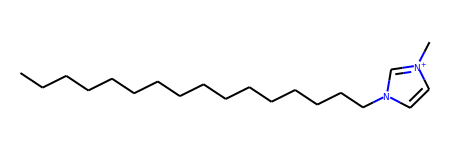

In [71]:
Chem.MolFromSmiles(literal_eval(df['cat seed'][0])[0])

In [72]:
for index, candidate in enumerate(df['candidate']):
    ms = [Chem.MolFromSmiles(literal_eval(df['cat seed'][index])[0]), Chem.MolFromSmiles(candidate), Chem.MolFromSmiles(literal_eval(df['cat seed'][index])[1])]
    fig = Draw.MolsToGridImage(ms[:],molsPerRow=4,subImgSize=(200,200),legends=[Chem.MolToSmiles(x) for x in ms[:]])
    fig.show()
    #fig.save('assets/cpt_viscosity_with_target_condition_{}.png'.format(index))

# choose two properties, number of top molecules, etc.

In [67]:
gen3vae = TwoMoleculeVAE()
gen3vae.create(char_set, char_set, qspr=True, weights_file='../models/gen3vae_cpt_thermal_conductivity_100.h5',
              qspr_outputs = 2)
model_1 = ['cpt']
salts_1, cations_1, target_1 = return_top_cations(model_1, return_min_values=True)
model_2 = ['thermal_conductivity']
salts_2, cations_2, target_2 = return_top_cations(model_2, return_min_values=False)

/home/wbeckner/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/generic.py:5079: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/home/wbeckner/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/generic.py:5080: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


Heat capacity at constant pressure, J/K/mol
total salts in training data:	1739
unique salts:	15
unique cations:	10
min/max values:	918.0000, 9000.0000

salts sorted in descending order and the minimum value of the top 10 unique cations was returned
Thermal conductivity, W/m/K
total salts in training data:	148
unique salts:	11
unique cations:	10
min/max values:	0.1060, 0.1300

salts sorted in ascending order and the maximum value of the top 10 unique cations was returned


/home/wbeckner/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/generic.py:5079: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/home/wbeckner/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/generic.py:5080: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


In [23]:
from sklearn.preprocessing import StandardScaler

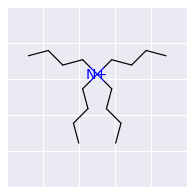

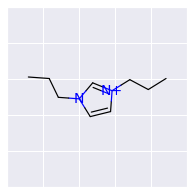

In [60]:
cat1 = cations_1[random.randint(0,len(cations_1)-1)]
im1 = Draw.MolToMPL(Chem.MolFromSmiles(cat1), size=(100,100))
cat2 = cations_2[random.randint(0,len(cations_1)-1)]
im2 = Draw.MolToMPL(Chem.MolFromSmiles(cat2), size=(100,100))

In [61]:
properties = ['cpt', 'thermal_conductivity']
T = [297, 316]
P = [99, 102]

devmodel = salty.aggregate_data(properties, T=T, P=P, merge='overlap')
devmodel.Data['smiles_string'] = devmodel.Data['smiles-cation'] + "." + devmodel.Data['smiles-anion']
cpt_thermal_salts = devmodel.Data['smiles_string']
cpt_thermal_salts = cpt_thermal_salts.reset_index(drop=True)
cpt_thermal_salts = cpt_thermal_salts.unique()

cpt_thermal_cations = [i.split('.')[0] for i in cpt_thermal_salts]
cpt_thermal_anions = [i.split('.')[1] for i in cpt_thermal_salts]

/home/wbeckner/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/generic.py:5079: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
/home/wbeckner/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/core/generic.py:5080: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)


In [63]:
values = [cat1,cat2]

z = []
for smi in salts:
    smi = smi.split('.')[0]
    z_i = gen3vae.cation_encoder.predict(one_hot(smi, char_to_index, smile_max_length=62))
    z.append(z_i[0])
z = np.array(z)

zt = []
for smi in values:
    zti = gen3vae.cation_encoder.predict(one_hot(smi, char_to_index, smile_max_length=62))
    zt.append(zti[0])
zt = np.array(zt)
# we can interpolate between these molecules...
ps = array([slerp(zt[0], zt[1], t) for t in np.arange(0.0, 1.0, 0.1)])

zt = np.concatenate([zt, ps])
pca = PCA(n_components=50)
pcs = pca.fit_transform(z)
pcst = pca.transform(zt)

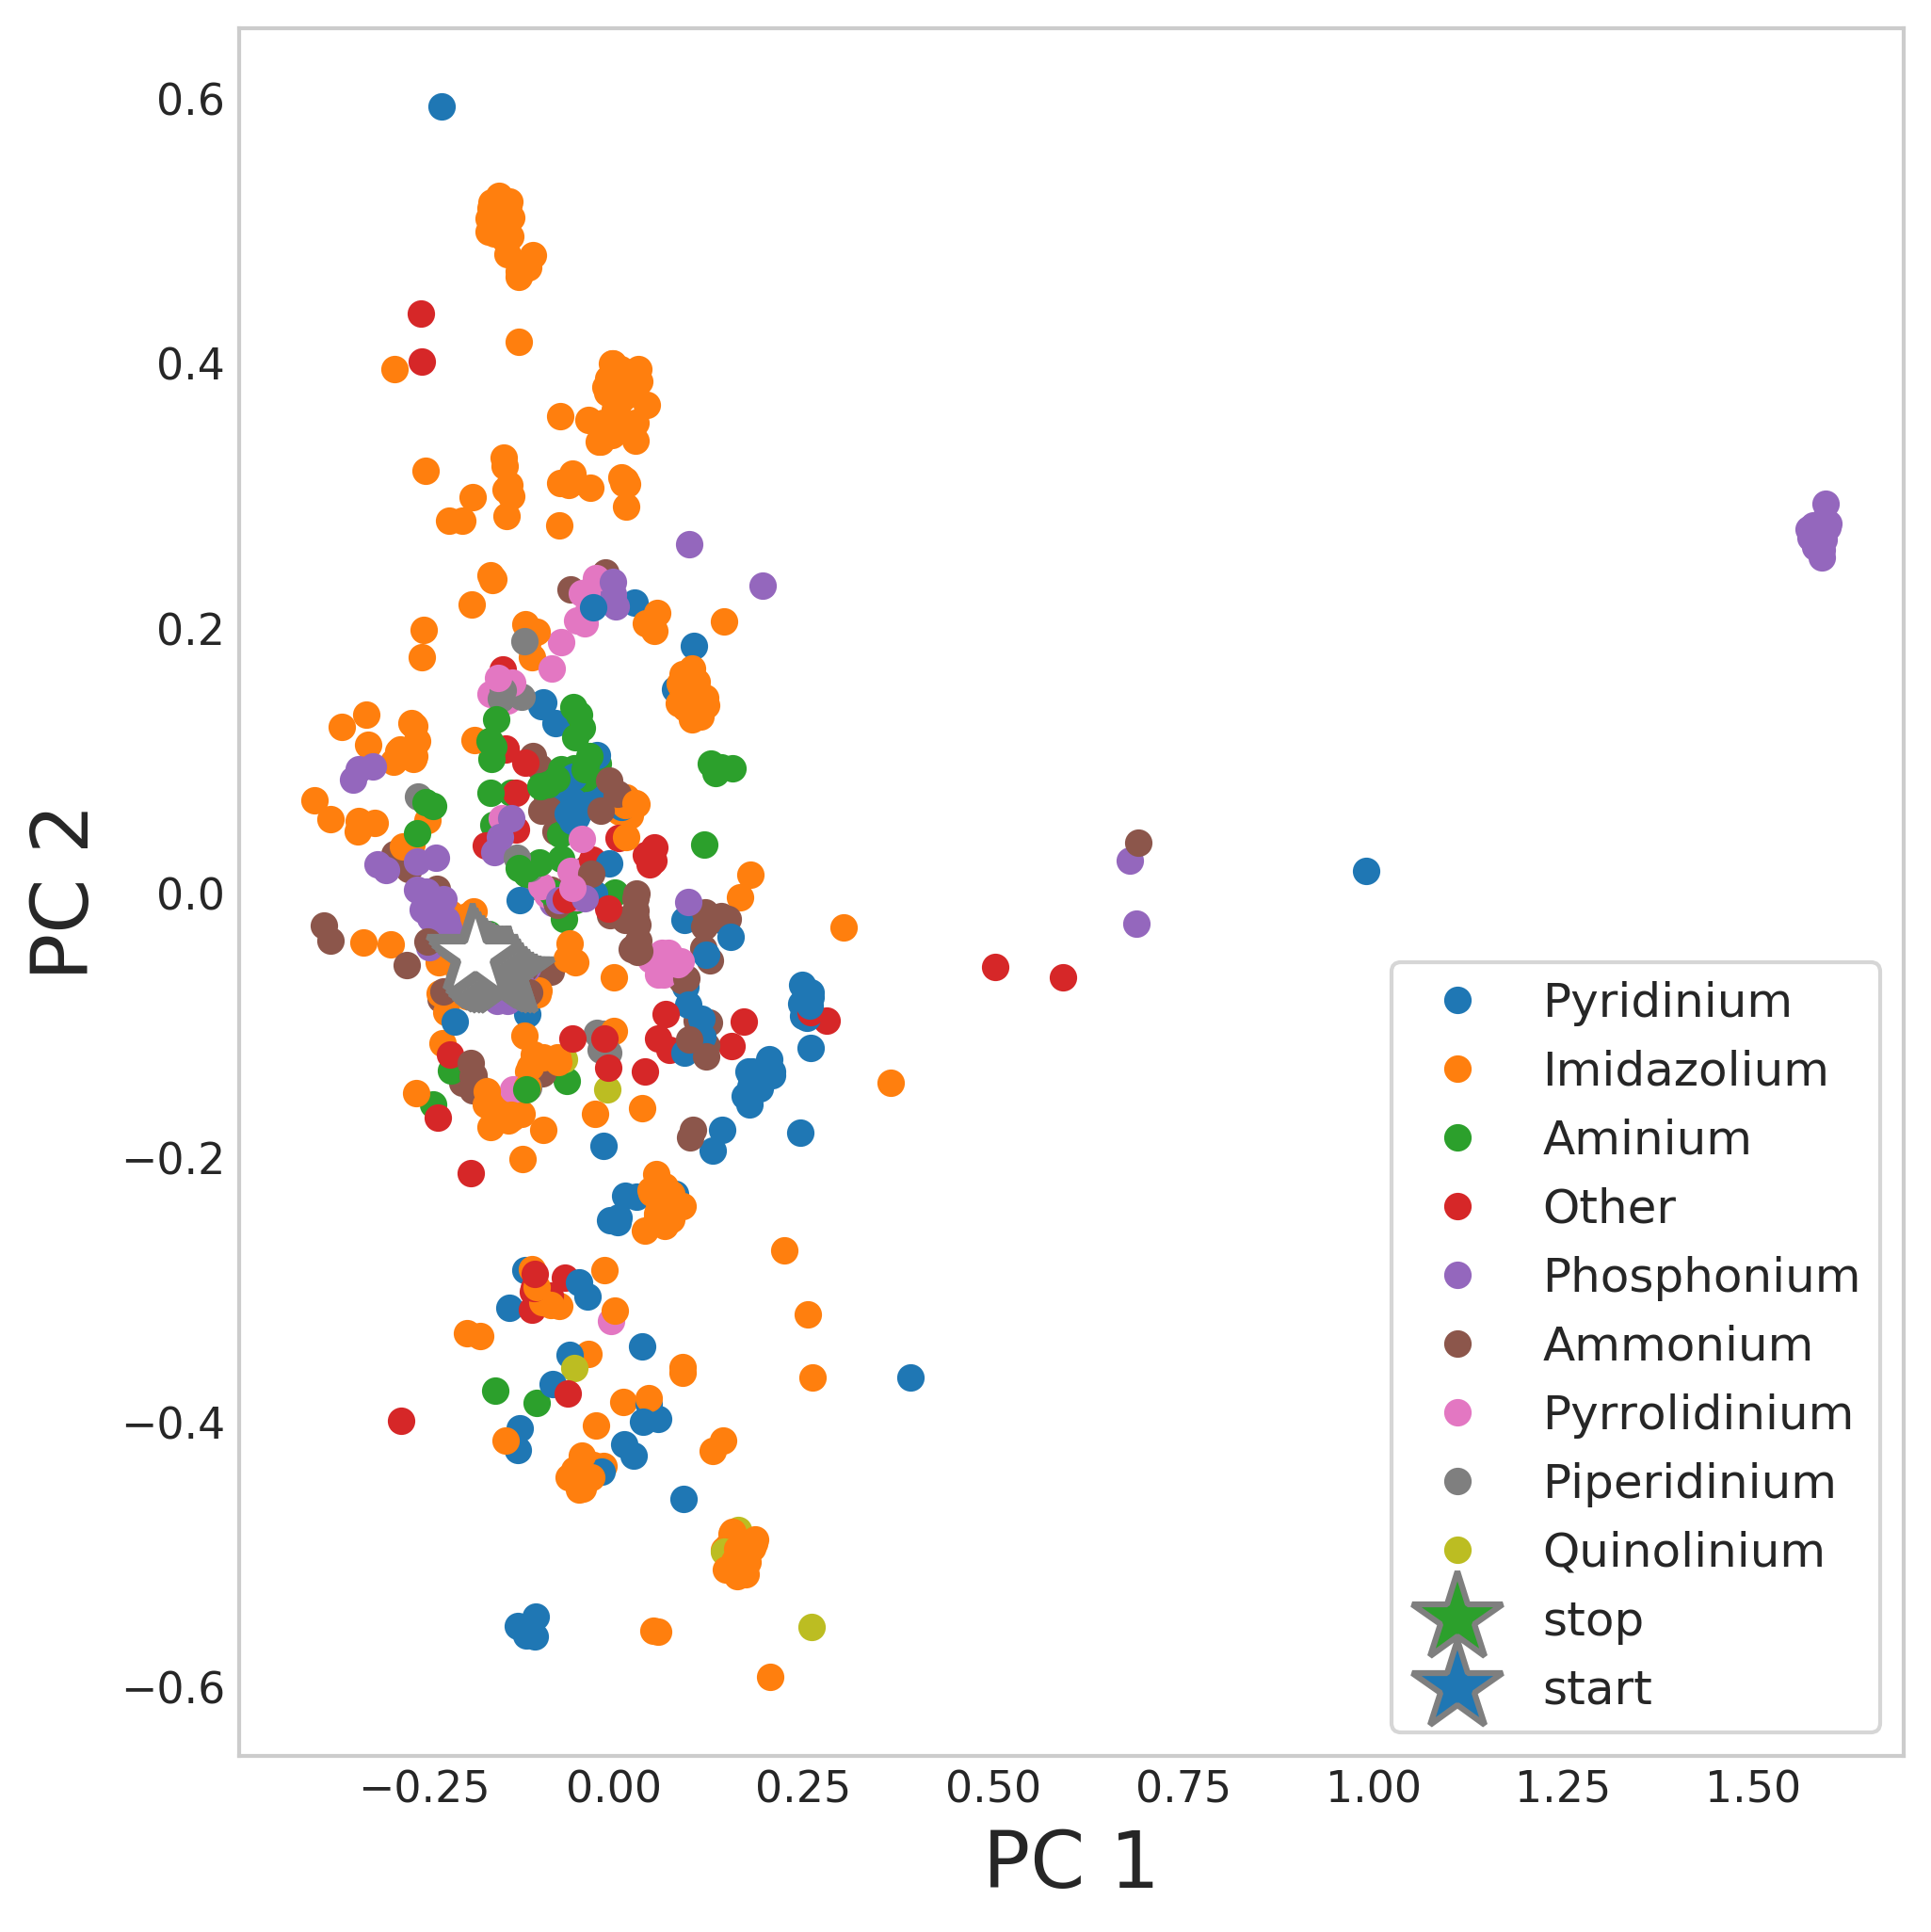

In [66]:
from collections import OrderedDict
with plt.style.context('seaborn-whitegrid'):
    fig = plt.figure(figsize=(7,7), dpi=300)
    ax1 = fig.add_subplot(111)
    for i in range(len(salt_categories)):
        x = pcs[i,0]
        y = pcs[i,1]
        ax1.plot(x, y, linestyle='', marker='.', 
                 color=coldic[salt_categories[i]], markersize=12, label=salt_categories[i])
    for index, targets in enumerate(pcst):
        if index == 2:
            ax1.plot(targets[0],targets[1], linestyle='',  marker='*',
                 color='tab:blue', markersize=24, label='start', 
                     markeredgewidth=1.5, markeredgecolor='tab:grey')
        elif index == 1:
            ax1.plot(targets[0],targets[1], linestyle='',  marker='*',
                 color='tab:green', markersize=24, label='stop',
                     markeredgewidth=1.5, markeredgecolor='tab:grey')
        else:
            ax1.plot(targets[0],targets[1], linestyle='',  marker='*',
                     color='white', markersize=24,
                     markeredgewidth=1.5, markeredgecolor='tab:grey')
#         ax1.text(targets[0], targets[1], '{}'.format(index), fontsize=12)
        
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    ax1.set_ylabel('PC 2', size=20)
    ax1.set_xlabel('PC 1', size=20)
    plt.legend(by_label.values(), by_label.keys(), frameon=True, fontsize=12)
    plt.grid()
    plt.tight_layout()

In [66]:
# fig.savefig('assets/interpolation_cpt_viscosity.svg', dpi=300)

In [73]:
qspr = True
md_model = None
from rdkit.Chem import AllChem as Chem
### setup
char_list = list(char_to_index.keys())
index_to_char = dict((i, c) for i, c in enumerate(char_list))
found_di = {'salt': [],
                'cat seed': [],
             'ani seed': [],
             'temperature': [],
              'candidate': [],
              'attempts': []}
if model_1 is not None:
    found_di.update(
            {'rdkit qspr 1': []})
if model_2 is not None:
    found_di.update(
            {'rdkit qspr 2': []})
if md_model is not None:
    found_di.update(
             {'rdkit-md qspr': []})
if qspr:
    found_di.update(
             {'vae qspr': []})
if model_1 is not None:
    for i, name in enumerate(model_1):
        model_1 = np.array([genetic.load_data("{}_qspr.h5".format(name),
                                            h5File=True)])
        deslist_1 = list([genetic.load_data("{}_desc.csv".format(name))])
        summary_1 = genetic.load_data("{}_summ.csv".format(name))

if model_2 is not None:
    for i, name in enumerate(model_2):
        model_2 = np.array([genetic.load_data("{}_qspr.h5".format(name),
                                            h5File=True)])
        deslist_2 = list([genetic.load_data("{}_desc.csv".format(name))])
        summary = genetic.load_data("{}_summ.csv".format(name))


In [74]:
found_di

{'salt': [],
 'cat seed': [],
 'ani seed': [],
 'temperature': [],
 'candidate': [],
 'attempts': [],
 'rdkit qspr 1': [],
 'rdkit qspr 2': [],
 'vae qspr': []}

In [75]:
df = interpolate_structures(gen3vae.cation_decoder, ps, char_to_index, 
                            limit=3*1e2, temp=max(0.2,random.random()*2), verbose=1)

interpolating between structures...
                     smiles temperature iteration
0  CCCC[P+](CCCC)(CCCC)CCCC    0.577887         1
1     CCCCCCC[P+](CCCC)CCCC    0.577887         1
2    CCCCCCCC[P+](CCCC)CCCC    0.577887        71
3      CCCCCCC[P+](CCC)CCCC    0.577887        19
4      CC=C[N+](CCC)CCCCCCC    0.577887        58
total iterations:	 1655


In [76]:
df = df[0]

In [77]:
ms = [i for i in df['smiles']]
ms.insert(0, cat1)
ms.insert(-1, cat2)

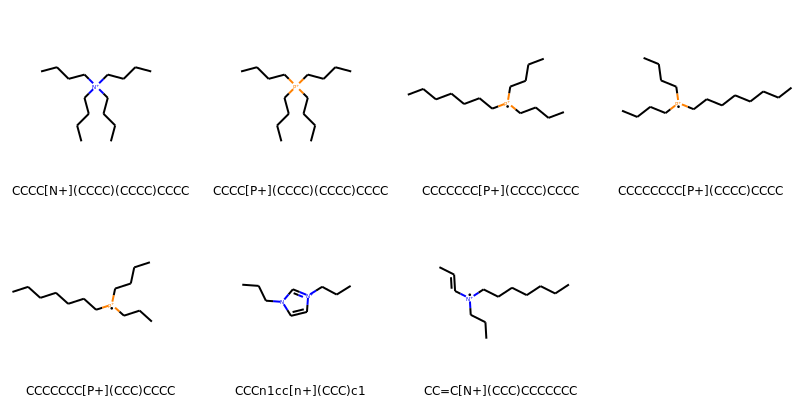

In [78]:
ms = [Chem.MolFromSmiles(smi) for smi in ms]
fig = Draw.MolsToGridImage(ms[:],molsPerRow=4,subImgSize=(200,200),legends=[Chem.MolToSmiles(x) for x in ms[:]])
# fig.save('assets/cpt_viscosity_interpolationg.png')
fig

In [79]:
anions = [i.split(".")[1] for i in salts]
anions = pd.Series(anions).unique()

In [80]:
target = None
predictions = []
for candidate in df['smiles'][:]:
    for anion_smi in anions:#[i.split('.')[1] for i in salts_1][:]:
        anion = Chem.MolFromSmiles(anion_smi)
        if model_1 is not None and target is not None:
            with suppress_rdkit_sanity():
                scr, pre = get_fitness(anion, candidate, target[0], model_1,
                                            deslist_1)
            pre_1 = pre[0]
        elif model_1 is not None: #we send a dummy variable to the fitness fn
            with suppress_rdkit_sanity():
                scr, pre = get_fitness(anion, candidate, 10, model_1,
                                            deslist_1)
            pre_1 = pre[0]

        if model_2 is not None and target is not None:
            with suppress_rdkit_sanity():
                scr, pre = get_fitness(anion, candidate, target[1], model_2,
                                            deslist_2)
            pre_2 = pre[0]

        elif model_2 is not None: #we send a dummy variable to the fitness fn
            with suppress_rdkit_sanity():
                scr, pre = get_fitness(anion, candidate, 10, model_2,
                                            deslist_2)
            pre_2 = pre[0]
        predictions.append([pre_1, pre_2, candidate, anion_smi])

In [40]:
returns = pd.DataFrame(predictions, columns=['cpt', 'viscosity', 'candidate', 'anion'])
returns.loc[(returns['viscosity'] <= target_2) & (returns['cpt'] >= target_1)].shape[0] > 0

True

In [ ]:
returns.loc[(returns[properties[0]] >= target_1) and 
            (returns[properties[1]] <= target_2)] # change < or >

In [41]:
returns.loc[returns['cpt'] >= target_1]

,cpt,viscosity,candidate,anion
13,1117.333862,0.10230,CCCC[P+](CCCC)(CCCC)CCCC,CCCCCCCCCC(=O)[O-]
16,2174.773926,0.10072,CCCC[P+](CCCC)(CCCC)CCCC,CC(CC(C)(C)C)CP(=O)(CC(C)CC(C)(C)C)[O-]
29,1024.125000,0.10228,CCCC[P+](CCCC)(CCCC)CCCC,[O-]P(=O)([O-])CCCCCC
31,1075.278809,0.10580,CCCC[P+](CCCC)(CCCC)CCCC,[O-]P([O-])(=O)CCCC
32,1108.346924,0.09802,CCCC[P+](CCCC)(CCCC)CCCC,O=P([O-])([O-])CCCCCCCC
37,1156.691406,0.11819,CCCC[P+](CCCC)(CCCC)CCCC,CCCCCCCCCCOS(=O)(=O)[O-]
38,1860.880859,0.18734,CCCC[P+](CCCC)(CCCC)CCCC,CCCCC(CC)COC(=O)CC(C(=O)OCC(CC)CCCC)S(=O)(=O)[O-]
41,957.707092,0.11345,CCCC[P+](CCCC)(CCCC)CCCC,C(CCN)C[C@@H](C(=O)[O-])N
42,954.771118,0.10451,CCCC[P+](CCCC)(CCCC)CCCC,C[C@H]([C@@H](C(=O)[O-])N)O
43,959.070312,0.10941,CCCC[P+](CCCC)(CCCC)CCCC,C([C@@H](C(=O)[O-])N)S


In [42]:
returns.loc[returns['viscosity'] <= target_2]

,cpt,viscosity,candidate,anion
2,724.154175,0.09517,CCCC[P+](CCCC)(CCCC)CCCC,N#C[B-](C#N)(C#N)C#N
3,589.926941,0.12768,CCCC[P+](CCCC)(CCCC)CCCC,C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F
4,677.709412,0.10827,CCCC[P+](CCCC)(CCCC)CCCC,C(#N)[N-]C#N
7,609.386475,0.10249,CCCC[P+](CCCC)(CCCC)CCCC,Cl[Fe-](Cl)(Cl)Cl
8,627.103760,0.12756,CCCC[P+](CCCC)(CCCC)CCCC,COS(=O)(=O)[O-]
9,754.279846,0.12833,CCCC[P+](CCCC)(CCCC)CCCC,[I-]
10,668.448303,0.11038,CCCC[P+](CCCC)(CCCC)CCCC,C(#N)[C-](C#N)C#N
11,697.880615,0.11989,CCCC[P+](CCCC)(CCCC)CCCC,C(#N)[S-]
12,748.314697,0.11723,CCCC[P+](CCCC)(CCCC)CCCC,CC(=O)[O-]
13,1117.333862,0.10230,CCCC[P+](CCCC)(CCCC)CCCC,CCCCCCCCCC(=O)[O-]
